In [1]:
import os
os.chdir('../')

In [2]:
import datetime

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

import torch

from src.configs import cfg
pd.options.display.max_rows = 1000

In [3]:
train = pd.read_csv(
    cfg.INPUT.ROOT_DIR+'/train_folds.csv'
)

In [4]:
train[train['patient_id'] == 5]

,Unnamed: 0,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,fold
37282,37282,2,5,640805896,L,MLO,68.0,0,0,0,0.0,0,NaN,21,True,4
37283,37283,2,5,1351088028,L,CC,68.0,0,0,0,0.0,0,NaN,21,True,3
37284,37284,2,5,940388076,R,CC,68.0,0,0,0,NaN,0,NaN,21,False,3
37285,37285,2,5,1633417959,R,MLO,68.0,0,0,0,NaN,0,NaN,21,False,4


In [5]:
train.head()

,Unnamed: 0,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,fold
0,0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,1
1,1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,1
2,2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,4
3,3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,4
4,4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,3


In [6]:
train['site_id'].value_counts()

1    29519
2    25187
Name: site_id, dtype: int64

In [7]:
train['patient_id'].nunique()

11913

In [8]:
train['cancer'].value_counts(normalize=True)

0    0.978832
1    0.021168
Name: cancer, dtype: float64

In [9]:
patient_positive = train[train['cancer'] == 1]['patient_id']
train[train['patient_id'].isin(patient_positive)]


,Unnamed: 0,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,fold
87,87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False,2
88,88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False,3
89,89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False,1
90,90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False,0
91,91,1,10130,1013166704,R,CC,71.0,0,0,0,NaN,0,B,49,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54594,54594,2,9840,1559360810,R,CC,59.0,1,1,1,NaN,0,NaN,21,False,1
54595,54595,2,9851,1409270544,L,MLO,58.0,1,1,0,NaN,0,NaN,48,False,4
54596,54596,2,9851,1434430689,L,CC,58.0,1,1,0,NaN,0,NaN,48,False,0
54597,54597,2,9851,446210671,R,CC,58.0,0,0,0,NaN,0,NaN,48,False,3


In [10]:
img = cv2.imread(
    os.path.join(
        cfg.INPUT.ROOT_DIR,
        'train_images_processed_cv2_256',
        '65534',
        '44480502.png'
    )
)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

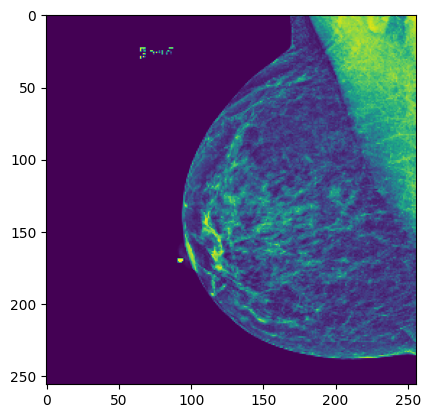

In [11]:
plt.figure()
plt.imshow(img)
plt.show()

In [12]:
img.shape

(256, 256)

In [13]:
from src.datasets.train_dataset import trainMammo
from src.datasets.transforms import get_train_transform

trnsf = get_train_transform(cfg = cfg)

train_dataset = trainMammo(
    cfg, 
    train[train['fold'] == cfg.INPUT.VALID_FOLD],
    transforms=trnsf
)

In [14]:
img, label, img_id, patient = train_dataset[0]

In [15]:
img.shape

torch.Size([1, 64, 64])

In [16]:
from src.datasets.builder import create_train_loader
train_loader = create_train_loader(
    cfg=cfg,
    df=train.sample(n=100)
)

In [17]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [18]:
for step, (images, targets, image_ids, patinet_id) in enumerate(train_loader):
    print(images.shape)

torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])
torch.Size([8, 1, 64, 64])


In [19]:
import timm

model = timm.create_model(
    'seresnext50_32x4d', 
    pretrained=True,
    in_chans=1,
    num_classes=0
)

In [20]:
model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/seresnext50_32x4d_racm-a304a460.pth',
 'num_classes': 1000,
 'input_size': (3, 224, 224),
 'pool_size': (7, 7),
 'crop_pct': 0.875,
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'first_conv': 'conv1',
 'classifier': 'fc',
 'architecture': 'seresnext50_32x4d'}

In [21]:
images = images.float()

In [22]:
model.layer4

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(1024, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (conv2): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=32, bias=False)
    (bn2): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_block): Identity()
    (act2): ReLU(inplace=True)
    (aa): Identity()
    (conv3): Conv2d(1024, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (se): SEModule(
      (fc1): Conv2d(2048, 128, kernel_size=(1, 1), stride=(1, 1))
      (bn): Identity()
      (act): ReLU(inplace=True)
      (fc2): Conv2d(128, 2048, kernel_size=(1, 1), stride=(1, 1))
      (gate): Sigmoid()
    )
    (act3): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2

In [23]:
preds = model(images)

In [24]:
preds.shape[-1]

2048

In [25]:
64*64

4096

In [26]:
model.parameters()

<generator object Module.parameters at 0x7f1fe03a1e40>

In [27]:
list(model.parameters())[-1].shape[0]

2048

In [28]:
from src.modeling.model import kaggleBCModel
model = kaggleBCModel(cfg)

In [29]:
torch.sigmoid(model(images))

tensor([[0.7261],
        [0.4653],
        [0.6662],
        [0.5345],
        [0.6059],
        [0.4889],
        [0.5800],
        [0.4900]], grad_fn=<SigmoidBackward0>)

In [30]:
from src.modeling.optimizer import make_optimizer
from src.modeling.scheduler import make_scheduler

In [31]:
optimizer = make_optimizer(cfg, model)
scheduler = make_scheduler(cfg, optimizer, train_loader)
scaler = torch.cuda.amp.GradScaler()

In [32]:
model.to('cuda').train()
for step, (imgs, targets, _, _) in enumerate(train_loader):
    
    imgs = imgs.to('cuda').float()
    targets = targets.to('cuda').float()
    bs = imgs.shape[0]

    optimizer.zero_grad()

    with torch.autocast(device_type='cuda'):
        preds = model(imgs).squeeze()
        loss = torch.nn.functional.binary_cross_entropy_with_logits(
            preds,
            targets,
            #TODO inserire uno scaling per lo sbilanciamento
            #pos_weight=torch.tensor([config.POSITIVE_TARGET_WEIGHT]).to(DEVICE)
        )
    
    scaled_loss = scaler.scale(loss)
    print(scaled_loss)
    scaled_loss.backward()
    scaler.step(optimizer)

    if scheduler is not None:
        scheduler.step()
        
    scaler.update()

MIOpen(HIP): Warning [SQLiteBase] Unable to read system database file:gfx900_64.kdb Performance may degrade


tensor([63264.0664], device='cuda:0', grad_fn=<MulBackward0>)
tensor([56232.9062], device='cuda:0', grad_fn=<MulBackward0>)


RuntimeError: step() has already been called since the last update().

In [ ]:
preds.shape

torch.Size([8, 1])

In [ ]:
targets.shape

torch.Size([8])

In [ ]:
targets.unsqueeze(1).shape

torch.Size([8, 1])